In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_path = 'data/Unipol_dataset_lab3.csv'
data = pd.read_csv(data_path)
data.drop(["Unnamed: 0"], inplace=True, axis=1)

In [4]:
data

,vehicle_id,trip_id,start_time,stop_time,road,total_distance
0,1,0,2023-09-29 13:55:35,2023-09-29 14:11:42,E,14.31
1,1,0,2023-09-29 13:55:35,2023-09-29 14:11:42,U,1.47
2,1,1,2023-09-29 14:32:24,2023-09-29 14:34:31,U,0.03
3,1,2,2023-09-29 15:12:03,2023-09-29 15:26:55,E,2.60
4,1,2,2023-09-29 15:12:03,2023-09-29 15:26:55,U,2.00
...,...,...,...,...,...,...
1415300,1000,474,2023-11-28 13:15:02,2023-11-28 13:36:51,U,0.52
1415301,1000,475,2023-11-28 14:49:22,2023-11-28 15:09:03,U,0.00
1415302,1000,476,2023-11-28 15:16:18,2023-11-28 15:18:11,U,0.00
1415303,1000,477,2023-11-28 15:18:31,2023-11-28 15:28:41,U,0.00


In [5]:
data.nunique()

vehicle_id          1000
trip_id            23862
start_time        867303
stop_time         867027
road                   4
total_distance     44580
dtype: int64

# Preliminary Analysis

## 1. What is the distribution of trip distance of different types of roads? Plot ecdf 

In [5]:
df = data

# Convert times to datetime
df["start_time"] = pd.to_datetime(df["start_time"])
df["stop_time"] = pd.to_datetime(df["stop_time"])

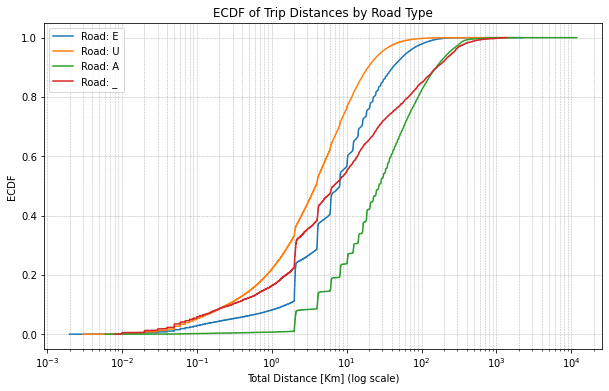

In [6]:
# Filter out zero distances to avoid log scale issues
df = df[df["total_distance"] > 0]

# Get unique road types
road_types = df["road"].unique()

# Plot ECDF for each road type
plt.figure(figsize=(10, 6))

for road in road_types:
    distances = df[df["road"] == road]["total_distance"]
    sorted_distances = np.sort(distances)
    ecdf = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances)
    plt.step(sorted_distances, ecdf, label=f"Road: {road}", where="post")

# Logarithmic scale for x-axis
plt.xscale("log")
plt.xlabel("Total Distance [Km] (log scale)")
plt.ylabel("ECDF")
plt.title("ECDF of Trip Distances by Road Type")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## 2. What is the distribution of trip duration?

C:\Users\Saeed\AppData\Local\Temp\ipykernel_18248\3216363543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trip_duration"] = (df["stop_time"] - df["start_time"]).dt.total_seconds() / 60


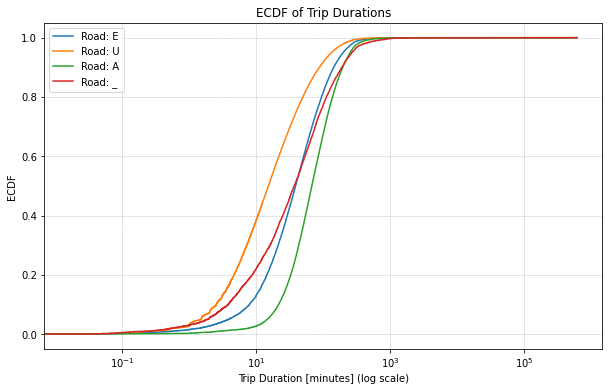

In [7]:
# Calculate trip duration in minutes
df["trip_duration"] = (df["stop_time"] - df["start_time"]).dt.total_seconds() / 60

# # Remove zero or negative durations (if any)
# df = df[df["trip_duration"] > 0]


# Get unique road types
road_types = df["road"].unique()

# Plot ECDF for each road type
plt.figure(figsize=(10, 6))

for road in road_types:
    durations = np.sort(df[df["road"] == road]["trip_duration"])
    ecdf = ecdf = np.arange(1, len(durations) + 1) / len(durations)
    plt.step(durations, ecdf, label=f"Road: {road}", where="post")


# Logarithmic scale for x-axis
plt.xscale("log")
plt.xlabel("Trip Duration [minutes] (log scale)")
plt.ylabel("ECDF")
plt.title("ECDF of Trip Durations")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## 3. What is the relationship between trip duration and distance? Can you spot any difference among trips with different road types? 

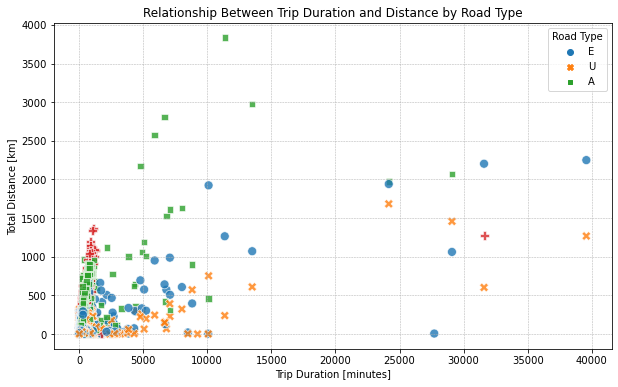

In [8]:
df = data

# Convert times to datetime and calculate trip duration in minutes
df["start_time"] = pd.to_datetime(df["start_time"])
df["stop_time"] = pd.to_datetime(df["stop_time"])
df["trip_duration"] = (df["stop_time"] - df["start_time"]).dt.total_seconds() / 60

df = df[(df["trip_duration"] > 0) & (df['trip_duration'] < 50000) & (df["total_distance"] > 0) & (df["total_distance"] < 4000)]

# Scatter plot with road type differentiation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="trip_duration",
    y="total_distance",
    hue="road",
    style="road",
    s=80,
    alpha=0.8
)


# Plot aesthetics
plt.xlabel("Trip Duration [minutes]")
plt.ylabel("Total Distance [km]")
plt.title("Relationship Between Trip Duration and Distance by Road Type")
plt.legend(title="Road Type")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

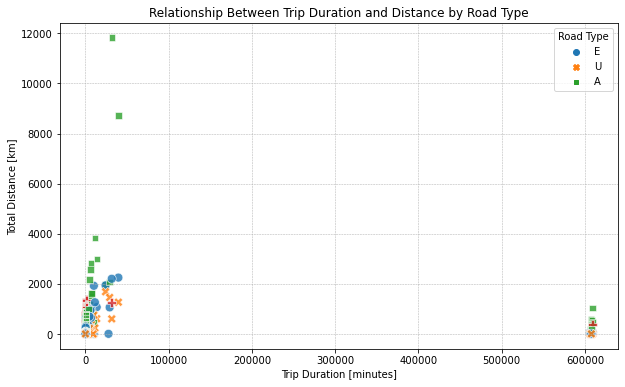

In [9]:
df = data

# Convert times to datetime and calculate trip duration in minutes
df["start_time"] = pd.to_datetime(df["start_time"])
df["stop_time"] = pd.to_datetime(df["stop_time"])
df["trip_duration"] = (df["stop_time"] - df["start_time"]).dt.total_seconds() / 60

# Remove rows with zero or negative durations and distances
df = df[(df["trip_duration"] > 0) & (df["total_distance"] > 0)]

# Scatter plot with road type differentiation
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x="trip_duration",
    y="total_distance",
    hue="road",
    style="road",
    s=80,
    alpha=0.8
)


# Plot aesthetics
plt.xlabel("Trip Duration [minutes]")
plt.ylabel("Total Distance [km]")
plt.title("Relationship Between Trip Duration and Distance by Road Type")
plt.legend(title="Road Type")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## 4. Filter the dataset, remove outliers (e.g. distance 0, impossible distance wrt duration) and report your filter criteria. How many valid trips are recorded in the dataset?

In [10]:
df = data

df = df[(df["trip_duration"] > 0) & (df['trip_duration'] < 50000) & (df["total_distance"] > 0) & (df["total_distance"] < 4000)]

C:\Users\Saeed\AppData\Local\Temp\ipykernel_18248\1773395544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["trip_duration"] = (df["stop_time"] - df["start_time"]).dt.total_seconds() / 60


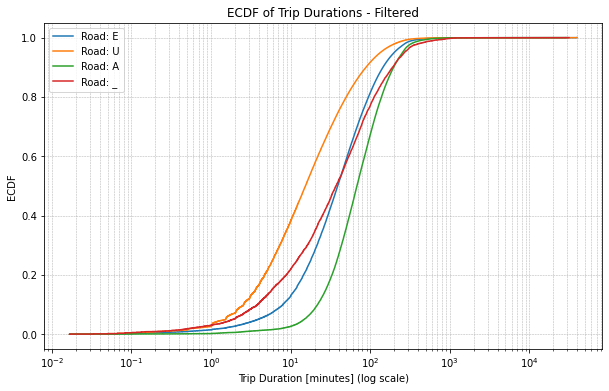

In [11]:
# Calculate trip duration in minutes
df["trip_duration"] = (df["stop_time"] - df["start_time"]).dt.total_seconds() / 60

# # Remove zero or negative durations (if any)
# df = df[df["trip_duration"] > 0]


# Get unique road types
road_types = df["road"].unique()

# Plot ECDF for each road type
plt.figure(figsize=(10, 6))

for road in road_types:
    durations = np.sort(df[df["road"] == road]["trip_duration"])
    ecdf = ecdf = np.arange(1, len(durations) + 1) / len(durations)
    plt.step(durations, ecdf, label=f"Road: {road}", where="post")


# Logarithmic scale for x-axis
plt.xscale("log")
plt.xlabel("Trip Duration [minutes] (log scale)")
plt.ylabel("ECDF")
plt.title("ECDF of Trip Durations - Filtered")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

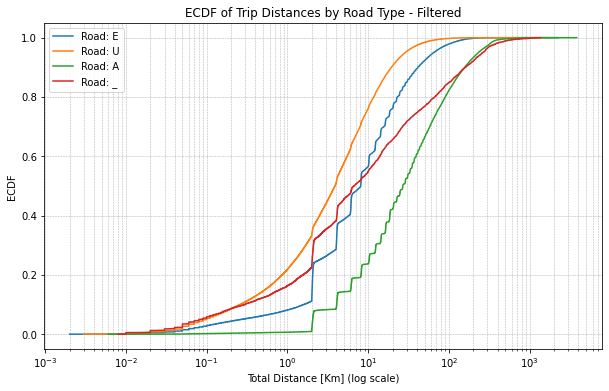

In [12]:
# Filter out zero distances to avoid log scale issues

# Get unique road types
road_types = df["road"].unique()

# Plot ECDF for each road type
plt.figure(figsize=(10, 6))

for road in road_types:
    distances = df[df["road"] == road]["total_distance"]
    sorted_distances = np.sort(distances)
    ecdf = np.arange(1, len(sorted_distances) + 1) / len(sorted_distances)
    plt.step(sorted_distances, ecdf, label=f"Road: {road}", where="post")

# Logarithmic scale for x-axis
plt.xscale("log")
plt.xlabel("Total Distance [Km] (log scale)")
plt.ylabel("ECDF")
plt.title("ECDF of Trip Distances by Road Type - Filtered")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Tasks

## Task 1

In [249]:
df = data

# filter
df = df[(df["trip_duration"] > 0) & (df['trip_duration'] < 50000) & (df["total_distance"] > 0) & (df["total_distance"] < 4000)]

# Assuming the dataframe 'df' is provided
df["start_time"] = pd.to_datetime(df["start_time"])
df["stop_time"] = pd.to_datetime(df["stop_time"])

# Extract date and weekday
df["date"] = df["start_time"].dt.date
df["weekday"] = df["start_time"].dt.weekday  # 0=Monday, 6=Sunday
df["is_weekend"] = df["weekday"] >= 5  # True for Saturday/Sunday

# Compute trip duration in minutes
df["trip_duration"] = (df["stop_time"] - df["start_time"]).dt.total_seconds() / 60

C:\Users\Saeed\AppData\Local\Temp\ipykernel_19484\2257994930.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["start_time"] = pd.to_datetime(df["start_time"])
C:\Users\Saeed\AppData\Local\Temp\ipykernel_19484\2257994930.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stop_time"] = pd.to_datetime(df["stop_time"])
C:\Users\Saeed\AppData\Local\Temp\ipykernel_19484\2257994930.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [250]:
# Daily aggregation per vehicle
daily_data = df.groupby(["vehicle_id", "date"]).agg(
    num_trips=("trip_id", "nunique"),
    total_distance=("total_distance", "sum"),
    total_driving_time=("trip_duration", "sum")
).reset_index()

# Compute utilization percentage
daily_data["utilization"] = ((daily_data["total_driving_time"] / (24 * 60))) * 100


In [251]:
daily_data

,vehicle_id,date,num_trips,total_distance,total_driving_time,utilization
0,1,2023-09-29,4,24.660,103.683333,7.200231
1,1,2023-09-30,8,11.480,127.183333,8.832176
2,1,2023-10-01,2,361.669,549.250000,38.142361
3,1,2023-10-02,8,725.245,1508.166667,104.733796
4,1,2023-10-03,11,519.800,1115.666667,77.476852
...,...,...,...,...,...,...
55770,1000,2023-11-23,1,0.050,187.183333,12.998843
55771,1000,2023-11-24,2,29.120,2113.200000,146.750000
55772,1000,2023-11-26,1,31.580,930.866667,64.643519
55773,1000,2023-11-27,2,39.420,1539.050000,106.878472


In [252]:
daily_data = daily_data[daily_data['total_driving_time'] <= 1440]
# daily_data = daily_data[daily_data['total_distance'] > 1]

## 1.a

In [253]:
# Merge weekday information
daily_data = daily_data.merge(
    df[["vehicle_id","date", "is_weekend"]].drop_duplicates(),
    on=["vehicle_id", "date"]
)

# Separate workdays and weekends
workdays = daily_data[~daily_data["is_weekend"]]
weekends = daily_data[daily_data["is_weekend"]]

# Compute statistics
workdays_stats = workdays[["num_trips", "total_distance", "utilization"]].describe()
weekends_stats = weekends[["num_trips", "total_distance", "utilization"]].describe()

'Workdays Statistics'

,num_trips,total_distance,utilization
count,29468.000000,29468.000000,29468.000000
mean,16.473395,290.630906,60.552053
std,18.780525,163.806209,26.012104
min,1.000000,0.010000,0.003472
25%,8.000000,191.110000,44.767940
50%,13.000000,276.895000,64.674190
75%,21.000000,375.659500,81.168113
max,611.000000,1745.530000,99.997685


'Weekends Statistics:'

,num_trips,total_distance,utilization
count,11239.000000,11239.000000,11239.000000
mean,13.184269,235.366664,47.919772
std,20.967575,167.918395,30.047743
min,1.000000,0.010000,0.011574
25%,4.000000,91.230000,20.526042
50%,9.000000,233.330000,50.326389
75%,17.000000,341.665000,73.097801
max,631.000000,1397.295000,100.000000


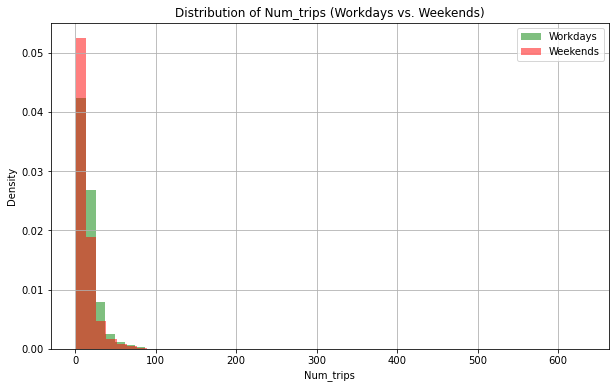

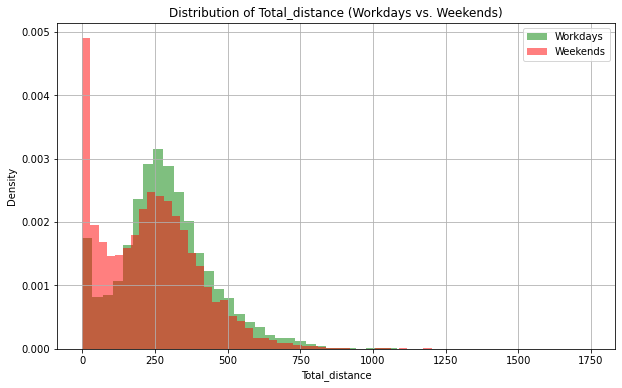

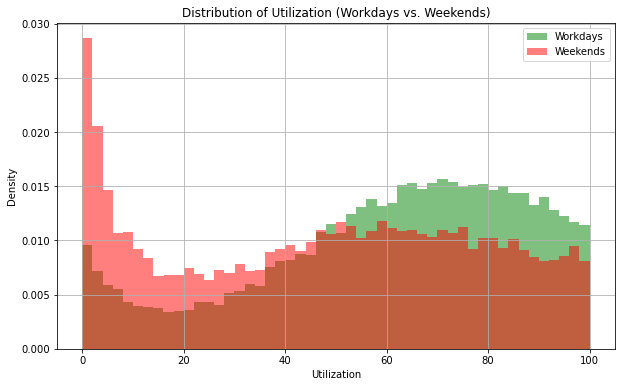

In [254]:
display("Workdays Statistics", workdays_stats)
display("Weekends Statistics:", weekends_stats)

# Visualization for differences
for col in ["num_trips", "total_distance", "utilization"]:
    plt.figure(figsize=(10, 6))
    plt.hist(workdays[col], bins=50, alpha=0.5, label="Workdays", density=True, color='green')
    plt.hist(weekends[col], bins=50, alpha=0.5, label="Weekends", density=True, color='red')
    plt.title(f"Distribution of {col.capitalize()} (Workdays vs. Weekends)")
    plt.xlabel(col.capitalize())
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

In [248]:
# # Add a small constant to avoid issues with log(0)
# epsilon = 1e-3

# # Columns to transform
# cols_to_transform_n_trip = ["num_trips"]
# cols_to_transform = ["total_distance", "utilization"]

# for col in cols_to_transform_n_trip:
#     # Log transform
#     workdays[f"log_{col}"] = np.log10(workdays[col] + epsilon)
#     weekends[f"log_{col}"] = np.log10(weekends[col] + epsilon)

#     # Plot log-transformed histograms
#     plt.figure(figsize=(10, 6))
#     plt.hist(workdays[f"log_{col}"], bins=20, alpha=0.5, label="Workdays", color="green", density=True)
#     plt.hist(weekends[f"log_{col}"], bins=20, alpha=0.5, label="Weekends", color="red", density=True)
#     plt.title(f"Log-Transformed Distribution of {col.capitalize()} (Workdays vs. Weekends)")
#     plt.xlabel(f"log({col.capitalize()})")
#     plt.ylabel("Density")
#     plt.legend()
#     plt.grid(True)
#     plt.show()
    
# for col in cols_to_transform:
#     # Log transform
#     workdays[f"log_{col}"] = np.log10(workdays[col] + epsilon)
#     weekends[f"log_{col}"] = np.log10(weekends[col] + epsilon)

#     # Plot log-transformed histograms
#     plt.figure(figsize=(10, 6))
#     plt.hist(workdays[f"log_{col}"], bins=120, alpha=0.5, label="Workdays", color="green", density=True)
#     plt.hist(weekends[f"log_{col}"], bins=120, alpha=0.5, label="Weekends", color="red", density=True)
#     plt.title(f"Log-Transformed Distribution of {col.capitalize()} (Workdays vs. Weekends)")
#     plt.xlabel(f"log({col.capitalize()})")
#     plt.ylabel("Density")
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [263]:
# Aggregate metrics by vehicle_id for workdays
workdays_agg = workday_data.groupby('vehicle_id').agg({
    'num_trips': 'mean',
    'total_distance': 'mean',
    'total_driving_time': 'mean',
    'utilization_percentage': 'mean'
}).reset_index()

# Aggregate metrics by vehicle_id for weekends
weekends_agg = weekend_data.groupby('vehicle_id').agg({
    'num_trips': 'mean',
    'total_distance': 'mean',
    'total_driving_time': 'mean',
    'utilization_percentage': 'mean'
}).reset_index()

# Merge the two aggregated dataframes on vehicle_id
comparison_df = pd.merge(workdays_agg, weekends_agg, on='vehicle_id', suffixes=('_workdays', '_weekends'))

# Calculate differences
comparison_df['num_trips_diff'] = abs(comparison_df['num_trips_workdays'] - comparison_df['num_trips_weekends'])
comparison_df['total_distance_diff'] = abs(comparison_df['total_distance_workdays'] - comparison_df['total_distance_weekends'])
comparison_df['total_driving_time_diff'] = abs(comparison_df['total_driving_time_workdays'] - comparison_df['total_driving_time_weekends'])
comparison_df['utilization_diff'] = abs(comparison_df['utilization_percentage_workdays'] - comparison_df['utilization_percentage_weekends'])

# Define a threshold for similarity (example: differences below 10%)
threshold = 10
similar_vehicles = comparison_df[
    (comparison_df['num_trips_diff'] <= threshold) &
    (comparison_df['total_distance_diff'] <= threshold) &
    (comparison_df['total_driving_time_diff'] <= threshold) &
    (comparison_df['utilization_diff'] <= threshold)
]

In [264]:
similar_vehicles

,vehicle_id,num_trips_workdays,total_distance_workdays,total_driving_time_workdays,utilization_percentage_workdays,num_trips_weekends,total_distance_weekends,total_driving_time_weekends,utilization_percentage_weekends,num_trips_diff,total_distance_diff,total_driving_time_diff,utilization_diff
87,88,60.545455,286.525227,809.614394,56.223222,58.333333,295.531667,815.169444,56.608989,2.212121,9.006439,5.555051,0.385767
411,413,17.295455,244.624545,725.475379,50.380235,15.888889,248.826111,724.135185,50.287166,1.406566,4.201566,1.340194,0.093069
882,887,37.950000,304.288000,802.580000,55.734722,44.125000,307.583750,795.478125,55.241536,6.175000,3.295750,7.101875,0.493186


## 1.b

C:\Users\Saeed\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:613: UserWarning: The handle <BarContainer object of 1000 artists> has a label of '_' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


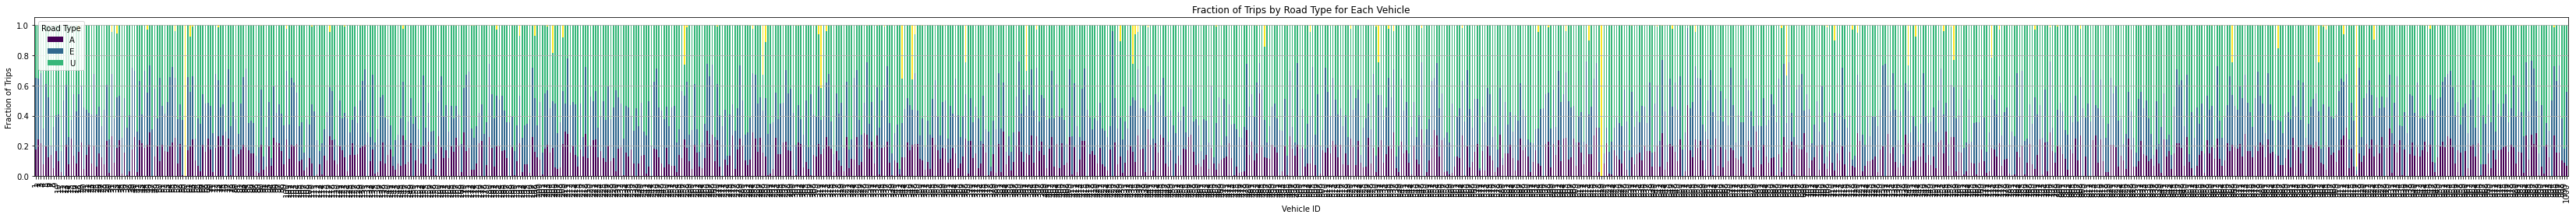

In [210]:
# Compute fraction of trips for each road type
road_fraction = df.groupby(["vehicle_id", "road"]).size().unstack(fill_value=0)
road_fraction = road_fraction.div(road_fraction.sum(axis=1), axis=0)

# Plot the fractions as a stacked bar chart
road_fraction.plot(kind="bar", stacked=True, figsize=(46, 4), cmap="viridis")
plt.title("Fraction of Trips by Road Type for Each Vehicle")
plt.xlabel("Vehicle ID")

plt.ylabel("Fraction of Trips")
plt.legend(title="Road Type", loc="best")
plt.tight_layout()
plt.grid(axis="y")
plt.show()

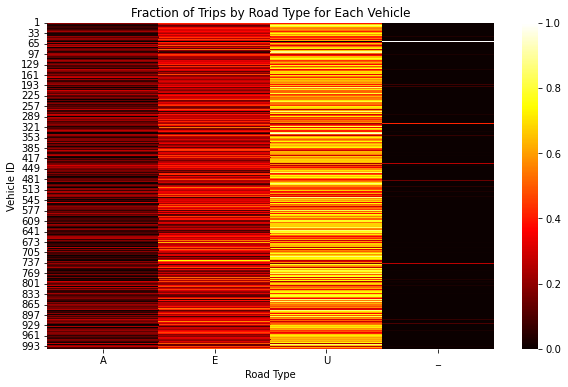

In [211]:
import matplotlib.pyplot as plt

# Create a heatmap-ready dataframe
road_fractions_heatmap = df.groupby(["vehicle_id", "road"]).size().unstack(fill_value=0)
road_fractions_heatmap = road_fractions_heatmap.div(road_fractions_heatmap.sum(axis=1), axis=0)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(road_fractions_heatmap, cmap="hot", cbar=True)
plt.title("Fraction of Trips by Road Type for Each Vehicle")
plt.xlabel("Road Type")
plt.ylabel("Vehicle ID")
plt.show()

## 1.c

In [90]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [266]:
clustering_data = daily_data.groupby("vehicle_id").agg(
    avg_num_trips=("num_trips", "mean"),
    avg_total_distance=("total_distance", "mean"),
    avg_utilization=("utilization", "mean")
).reset_index()

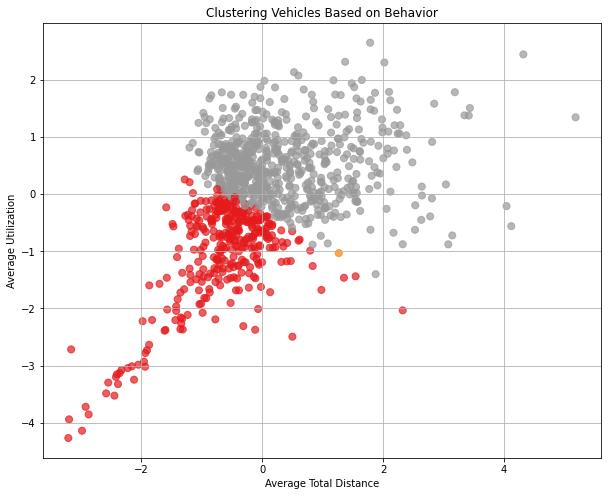

         vehicle_id  avg_num_trips  avg_total_distance  avg_utilization
cluster                                                                
0        484.611940      11.617749          221.940417        43.667110
1        539.000000     376.306452          382.484677        43.602001
2        508.817221      14.197784          304.591209        62.728377


In [267]:
# Standardize the features
scaler = StandardScaler()
clustering_features = scaler.fit_transform(clustering_data[["avg_num_trips", "avg_total_distance", "avg_utilization"]])

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=100)
clustering_data["cluster"] = kmeans.fit_predict(clustering_features)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(
    clustering_features[:, 1], clustering_features[:, 2],
    c=clustering_data["cluster"], cmap="Set1", s=50, alpha=0.7
)
plt.title("Clustering Vehicles Based on Behavior")
plt.xlabel("Average Total Distance")
plt.ylabel("Average Utilization")
# plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

# Print cluster characteristics
print(clustering_data.groupby("cluster").mean())

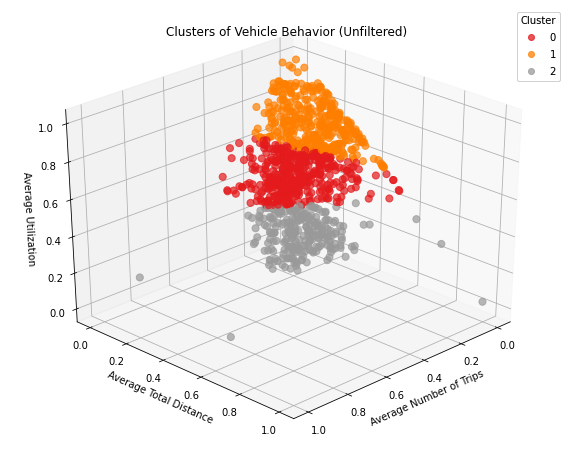

In [268]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute IQR for outlier detection
road_fractions_filtered = road_fractions_heatmap.copy()
Q1 = road_fractions_filtered.quantile(0.0)
Q3 = road_fractions_filtered.quantile(1)
IQR = Q3 - Q1

# Filter data: keep rows within the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
road_fractions_filtered = road_fractions_filtered[
    ~((road_fractions_filtered < (Q1 - 1.5 * IQR)) | 
      (road_fractions_filtered > (Q3 + 1.5 * IQR))).any(axis=1)
]

# Step 2: Normalize the filtered data
scaler = MinMaxScaler()
road_fractions_normalized = scaler.fit_transform(road_fractions_filtered)

# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=100)
clusters = kmeans.fit_predict(road_fractions_normalized)

# Add cluster information to the original data for plotting
road_fractions_filtered['Cluster'] = clusters

# Step 5: Visualize the clusters in the PCA space
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=road_fractions_normalized[:, 0], y=road_fractions_normalized[:, 2], hue=clusters, palette="Set3", s=50)
# plt.title("Clusters of Vehicle Behavior by Road Type (Filtered Data)")
# plt.xlabel("avg_num_trips")
# plt.ylabel("avg_total_distance")
# plt.legend(title="Cluster")
# plt.grid(alpha=0.5)
# plt.show()
# Prepare 3D data for visualization (using the normalized data)
x = road_fractions_normalized[:, 0]  # Feature 1 (e.g., avg_num_trips)
y = road_fractions_normalized[:, 1]  # Feature 2 (e.g., avg_total_distance)
z = road_fractions_normalized[:, 2]  # Feature 3 (e.g., avg_utilization)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points in 3D space with cluster colors
scatter = ax.scatter(x, y, z, c=clusters, cmap="Set1", s=50, alpha=0.7)

# Label axes
ax.set_title("Clusters of Vehicle Behavior (Unfiltered)")
ax.set_xlabel("Average Number of Trips")
ax.set_ylabel("Average Total Distance")
ax.set_zlabel("Average Utilization")

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right")
ax.add_artist(legend)

# Improve the view angle
ax.view_init(elev=30, azim=45)

# Show the plot
plt.show()

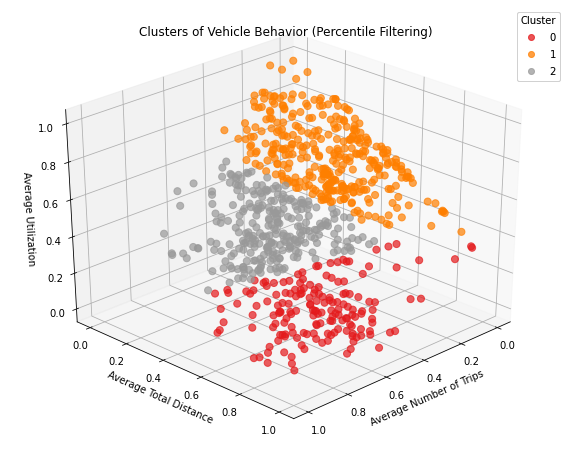

In [215]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute IQR for outlier detection
road_fractions_filtered = road_fractions_heatmap.copy()
Q1 = road_fractions_filtered.quantile(0.25)
Q3 = road_fractions_filtered.quantile(0.75)
IQR = Q3 - Q1

# Filter data: keep rows within the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
road_fractions_filtered = road_fractions_filtered[
    ~((road_fractions_filtered < (Q1 - 1.5 * IQR)) | 
      (road_fractions_filtered > (Q3 + 1.5 * IQR))).any(axis=1)
]

# Step 2: Normalize the filtered data
scaler = MinMaxScaler()
road_fractions_normalized = scaler.fit_transform(road_fractions_filtered)

# Step 4: Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=100)
clusters = kmeans.fit_predict(road_fractions_normalized)

# Add cluster information to the original data for plotting
road_fractions_filtered['Cluster'] = clusters

# Step 5: Visualize the clusters in the PCA space
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=road_fractions_normalized[:, 0], y=road_fractions_normalized[:, 2], hue=clusters, palette="Set3", s=50)
# plt.title("Clusters of Vehicle Behavior by Road Type (Filtered Data)")
# plt.xlabel("avg_num_trips")
# plt.ylabel("avg_total_distance")
# plt.legend(title="Cluster")
# plt.grid(alpha=0.5)
# plt.show()
# Prepare 3D data for visualization (using the normalized data)
x = road_fractions_normalized[:, 0]  # Feature 1 (e.g., avg_num_trips)
y = road_fractions_normalized[:, 1]  # Feature 2 (e.g., avg_total_distance)
z = road_fractions_normalized[:, 2]  # Feature 3 (e.g., avg_utilization)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points in 3D space with cluster colors
scatter = ax.scatter(x, y, z, c=clusters, cmap="Set1", s=50, alpha=0.7)

# Label axes
ax.set_title("Clusters of Vehicle Behavior (Percentile Filtering)")
ax.set_xlabel("Average Number of Trips")
ax.set_ylabel("Average Total Distance")
ax.set_zlabel("Average Utilization")

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right")
ax.add_artist(legend)

# Improve the view angle
ax.view_init(elev=30, azim=45)

# Show the plot
plt.show()

C:\Users\Saeed\AppData\Local\Temp\ipykernel_19484\1999652060.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  road_fractions_filtered['Cluster'] = clusters


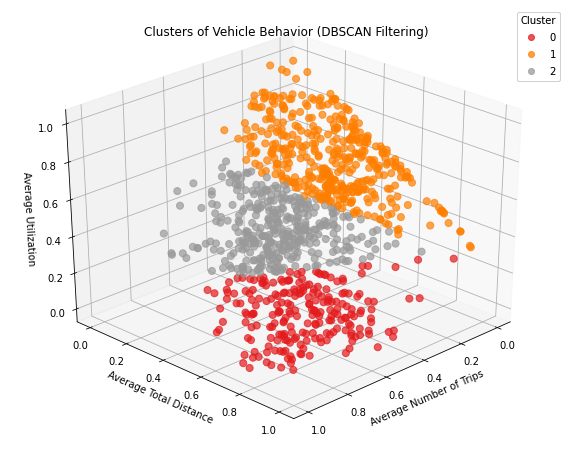

In [216]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Normalize the data
scaler = MinMaxScaler()
road_fractions_normalized = scaler.fit_transform(road_fractions_heatmap)

# Step 2: Use DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.2, min_samples=100)  # Adjust eps and min_samples as needed
outlier_labels = dbscan.fit_predict(road_fractions_normalized)

# Filter out outliers (DBSCAN labels outliers as -1)
inlier_mask = outlier_labels != -1
road_fractions_filtered = road_fractions_heatmap[inlier_mask]

# Step 3: Re-normalize after filtering
road_fractions_normalized_filtered = scaler.fit_transform(road_fractions_filtered)

# Step 4: Apply K-Means clustering to the filtered data
kmeans = KMeans(n_clusters=3, random_state=100)
clusters = kmeans.fit_predict(road_fractions_normalized_filtered)

# Add cluster information to the filtered data
road_fractions_filtered['Cluster'] = clusters

# Step 5: Prepare data for 3D visualization
x = road_fractions_normalized_filtered[:, 0]  # Feature 1 (e.g., avg_num_trips)
y = road_fractions_normalized_filtered[:, 1]  # Feature 2 (e.g., avg_total_distance)
z = road_fractions_normalized_filtered[:, 2]  # Feature 3 (e.g., avg_utilization)

# Step 6: Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter points in 3D space with cluster colors
scatter = ax.scatter(x, y, z, c=clusters, cmap="Set1", s=50, alpha=0.7)

# Label axes
ax.set_title("Clusters of Vehicle Behavior (DBSCAN Filtering)")
ax.set_xlabel("Average Number of Trips")
ax.set_ylabel("Average Total Distance")
ax.set_zlabel("Average Utilization")

# Add a legend
legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right")
ax.add_artist(legend)

# Improve the view angle
ax.view_init(elev=30, azim=45)

# Show the plot
plt.show()

In [319]:
clusters

array([2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 0, 2,
       2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 1, 1,
       0, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 1, 0, 0, 1, 0, 2, 2, 0, 0, 0, 1,
       1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 1,
       1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 2,
       1, 0, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       1, 0, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 0, 2, 2, 0,
       0, 2, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 1, 1,

## Tsak 2

In [341]:
ev_models_data = {
    "models": [
        {
            "name": "Alfa Romeo Junior Elettrica",
            "parameters": {
                "vehicle_consumption_mild_weather": {
                    "city_km": 475,
                    "highway_km": 290,
                    "combined_km": 365
                },
                "usable_battery_capacity_kwh": 50.8,
                "charging_power_ac_kw": 11,
                "fast_charging_power_dc_kw": 100,
                "cost": 39500
            }
        },
        {
            "name": "Fiat Grande Panda",
            "parameters": {
                "vehicle_consumption_mild_weather": {
                    "city_km": 390,
                    "highway_km": 230,
                    "combined_km": 295
                },
                "usable_battery_capacity_kwh": 43.8,
                "charging_power_ac_kw": 7.4,
                "fast_charging_power_dc_kw": 100,
                "cost": 24000
            }
        },
        {
            "name": "Tesla Model 3",
            "parameters": {
                "vehicle_consumption_mild_weather": {
                    "city_km": 615,
                    "highway_km": 405,
                    "combined_km": 495
                },
                "usable_battery_capacity_kwh": 57.5,
                "charging_power_ac_kw": 11,
                "fast_charging_power_dc_kw": 170,
                "cost": 40970
            }
        }
    ]
}

In [339]:
ev_models_data['models'][0]['parameters']

{'vehicle_consumption_mild_weather': {'city_km': 475,
  'highway_km': 290,
  'combined_km': 365},
 'usable_battery_capacity_kwh': 50.8,
 'charging_power_ac_kw': 11,
 'fast_charging_power_dc_kw': 100,
 'cost': 39500}

In [273]:
# Helper functions
def calculate_energy_required(trip_distance, consumption_rate):
    """Calculate energy required for a trip based on distance and consumption rate."""
    return trip_distance / consumption_rate

def recharge_battery(current_soc, charge_duration_min, charging_power_kw, battery_capacity_kwh):
    """Simulate battery recharge during a parking period."""
    charged_energy = (charge_duration_min / 60) * charging_power_kw
    new_soc = min(current_soc + (charged_energy / battery_capacity_kwh) * 100, 100)
    return new_soc

# Simulation function
def simulate_vehicle(vehicle_name, parameters, trip_data, charging_type="AC"):
    battery_capacity_kwh = parameters["usable_battery_capacity_kwh"]
    consumption_rate = parameters["vehicle_consumption_mild_weather"]["combined_km"]
    charging_power = parameters[f"charging_power_{charging_type.lower()}_kw"]
    
    soc = 100  # Start with a full battery
    unfeasible_trips = 0
    soc_records = []
    
    for _, trip in trip_data.iterrows():
        distance = trip["total_distance"]
        energy_required_kwh = calculate_energy_required(distance, consumption_rate)
        if energy_required_kwh > (soc / 100) * battery_capacity_kwh:
            unfeasible_trips += 1
            soc = 0  # Assume vehicle finishes trip with 0 SoC
        else:
            soc -= (energy_required_kwh / battery_capacity_kwh) * 100
        
        # Simulate charging during parking (assume parked for 30 minutes)
        parking_duration_min = 30  # Example value
        soc = recharge_battery(soc, parking_duration_min, charging_power, battery_capacity_kwh)
        soc_records.append(soc)
    
    average_soc = np.mean(soc_records)
    return {
        "vehicle": vehicle_name,
        "unfeasible_trips": unfeasible_trips,
        "average_soc": average_soc,
        "total_trips": len(trip_data),
        "percentage_unfeasible": (unfeasible_trips / len(trip_data)) * 100
    }

# Run simulation for all EV models
results = []
for model in ev_models_data["models"]:
    model_name = model["name"]
    model_parameters = model["parameters"]
    filtered_trip_data = df  # Filter trips for the vehicle if needed
    result = simulate_vehicle(model_name, model_parameters, filtered_trip_data, charging_type="AC")
    results.append(result)

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

# Analyze and visualize results
print(results_df)

                       vehicle  unfeasible_trips  average_soc  total_trips  \
0  Alfa Romeo Junior Elettrica                 0    99.999974      1249061   
1            Fiat Grande Panda                 0    99.999534      1249061   
2                Tesla Model 3                 0    99.999996      1249061   

   percentage_unfeasible  
0                    0.0  
1                    0.0  
2                    0.0  


In [274]:
results_df

,vehicle,unfeasible_trips,average_soc,total_trips,percentage_unfeasible
0,Alfa Romeo Junior Elettrica,0,99.999974,1249061,0.0
1,Fiat Grande Panda,0,99.999534,1249061,0.0
2,Tesla Model 3,0,99.999996,1249061,0.0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


# Prepare data
def assign_vehicle_models(data, models):
    vehicle_ids = data['vehicle_id'].unique()
    model_assignments = {vehicle_id: models[i % len(models)] for i, vehicle_id in enumerate(vehicle_ids)}
    return model_assignments

def calculate_energy_consumption(road_type, distance, model):
    if road_type == 'U':  # Urban
        consumption = model["parameters"]["vehicle_consumption_mild_weather"]["city_km"]
    elif road_type == 'A':  # Highway
        consumption = model["parameters"]["vehicle_consumption_mild_weather"]["highway_km"]
    else:  # Extra-Urban or Unknown
        consumption = model["parameters"]["vehicle_consumption_mild_weather"]["combined_km"]
    return distance / consumption * model["parameters"]["usable_battery_capacity_kwh"]

# Simulate trips
def simulate_trips(data, model_assignments, charging_type="AC", charging_threshold=30, charging_power=None):
    results = []
    for vehicle_id, trips in tqdm(data.groupby('vehicle_id')):
        model = model_assignments[vehicle_id]
        battery_capacity = model["parameters"]["usable_battery_capacity_kwh"]
        charging_power = model["parameters"]["charging_power_ac_kw"] if charging_type == "AC" else model["parameters"]["fast_charging_power_dc_kw"]

        # Initialize SoC
        soc = battery_capacity
        unfeasible_trips = 0
        total_trips = 0
        soc_values = []

        for _, trip in trips.iterrows():
            energy_needed = calculate_energy_consumption(trip['road'], trip['total_distance'], model)
            if energy_needed > soc:
                unfeasible_trips += 1
                soc = 0  # Assume vehicle reaches destination with 0 SoC
            else:
                soc -= energy_needed
            
            # Simulate charging during parking
            if trip['start_time'] and trip['stop_time']:
                parking_duration = (trip['stop_time'] - trip['start_time']).total_seconds() / 60  # Minutes
                if parking_duration >= charging_threshold:
                    soc = min(soc + parking_duration / 60 * charging_power, battery_capacity)

            soc_values.append(soc)
            total_trips += 1

        results.append({
            "vehicle_id": vehicle_id,
            "model": model["name"],
            "unfeasible_trips": unfeasible_trips,
            "total_trips": total_trips,
            "unfeasible_percentage": unfeasible_trips / total_trips * 100,
            "avg_soc": np.mean(soc_values)
        })
    return pd.DataFrame(results)

# Load and process data
data = df
data['start_time'] = pd.to_datetime(data['start_time'])
data['stop_time'] = pd.to_datetime(data['stop_time'])
vehicle_models = assign_vehicle_models(data, ev_models_data["models"])

# Perform simulation
simulation_results_ac = simulate_trips(data, vehicle_models, charging_type="AC")
simulation_results_dc = simulate_trips(data, vehicle_models, charging_type="DC")

In [279]:
# # Analyze results
# print("AC Charging Results:")
# print(simulation_results_ac.describe())
# print("\nDC Charging Results:")
# print(simulation_results_dc.describe())

In [276]:
simulation_results_ac

,vehicle_id,model,unfeasible_trips,total_trips,unfeasible_percentage,avg_soc
0,1,Alfa Romeo Junior Elettrica,10,864,1.157407,49.971231
1,2,Fiat Grande Panda,58,593,9.780776,41.810818
2,3,Tesla Model 3,19,771,2.464332,57.315632
3,4,Alfa Romeo Junior Elettrica,0,696,0.000000,50.335789
4,5,Fiat Grande Panda,47,558,8.422939,42.416197
...,...,...,...,...,...,...
995,996,Tesla Model 3,7,594,1.178451,56.744962
996,997,Alfa Romeo Junior Elettrica,11,568,1.936620,49.682396
997,998,Fiat Grande Panda,0,1121,0.000000,40.614480
998,999,Tesla Model 3,0,2024,0.000000,55.537347


In [277]:
simulation_results_dc

,vehicle_id,model,unfeasible_trips,total_trips,unfeasible_percentage,avg_soc
0,1,Alfa Romeo Junior Elettrica,10,864,1.157407,50.261189
1,2,Fiat Grande Panda,57,593,9.612142,43.717405
2,3,Tesla Model 3,19,771,2.464332,57.319095
3,4,Alfa Romeo Junior Elettrica,0,696,0.000000,50.335789
4,5,Fiat Grande Panda,47,558,8.422939,43.640210
...,...,...,...,...,...,...
995,996,Tesla Model 3,7,594,1.178451,56.808484
996,997,Alfa Romeo Junior Elettrica,11,568,1.936620,50.207207
997,998,Fiat Grande Panda,0,1121,0.000000,41.690000
998,999,Tesla Model 3,0,2024,0.000000,55.623120


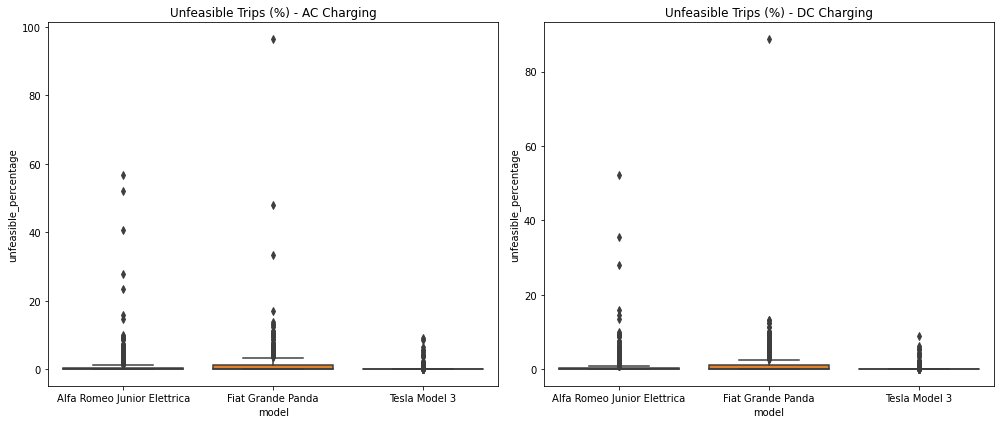

In [280]:
# Compare results visually
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=simulation_results_ac, x="model", y="unfeasible_percentage", ax=axes[0])
axes[0].set_title("Unfeasible Trips (%) - AC Charging")
sns.boxplot(data=simulation_results_dc, x="model", y="unfeasible_percentage", ax=axes[1])
axes[1].set_title("Unfeasible Trips (%) - DC Charging")
plt.tight_layout()
plt.show()

In [288]:
daily_data.groupby("vehicle_id").sum("num_trips")

,num_trips,total_distance,total_driving_time,utilization,is_weekend
vehicle_id,,,,,
1,393,18146.097,41419.933333,2876.384259,12
2,76,5466.480,13727.816667,953.320602,4
3,96,5037.872,11738.733333,815.189815,2
4,458,13942.800,47755.916667,3316.383102,18
5,74,2380.300,6726.650000,467.128472,7
...,...,...,...,...,...
996,117,4027.600,9376.483333,651.144676,8
997,195,10393.080,20854.233333,1448.210648,6
998,518,13728.660,31647.900000,2197.770833,12


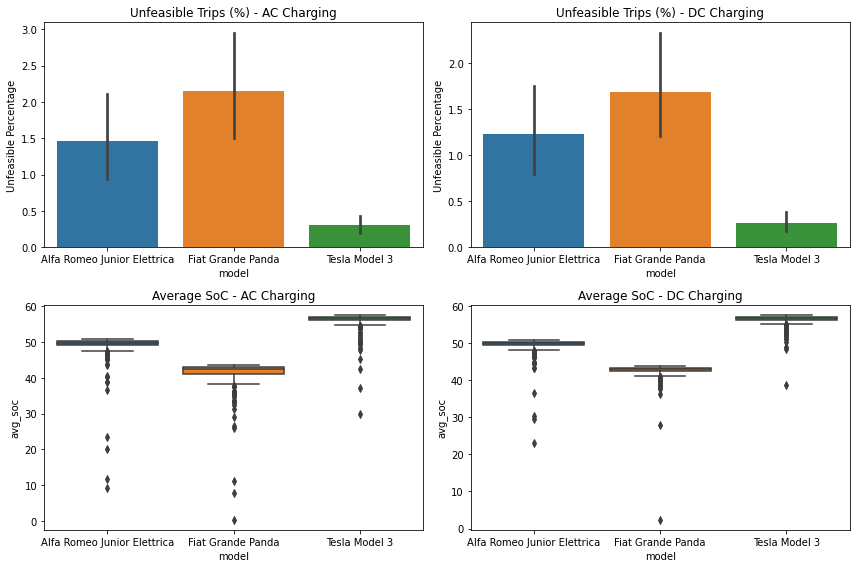

In [362]:
# Visualization: Unfeasible Trips and Metrics Distribution
def plot_metrics_distributions(simulation_results_ac, simulation_results_dc):
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # Bar plot: Unfeasible trips percentage
    sns.barplot(data=simulation_results_ac, x="model", y="unfeasible_percentage", ax=axes[0, 0])
    axes[0, 0].set_title("Unfeasible Trips (%) - AC Charging")
    axes[0, 0].set_ylabel("Unfeasible Percentage")
    
    sns.barplot(data=simulation_results_dc, x="model", y="unfeasible_percentage", ax=axes[0, 1])
    axes[0, 1].set_title("Unfeasible Trips (%) - DC Charging")
    axes[0, 1].set_ylabel("Unfeasible Percentage")
    
    # Box plot: Average SoC
    sns.boxplot(data=simulation_results_ac, x="model", y="avg_soc", ax=axes[1, 0])
    axes[1, 0].set_title("Average SoC - AC Charging")
    
    sns.boxplot(data=simulation_results_dc, x="model", y="avg_soc", ax=axes[1, 1])
    axes[1, 1].set_title("Average SoC - DC Charging")
    
    plt.tight_layout()
    plt.show()


# Plotting metrics distributions
plot_metrics_distributions(simulation_results_ac, simulation_results_dc)

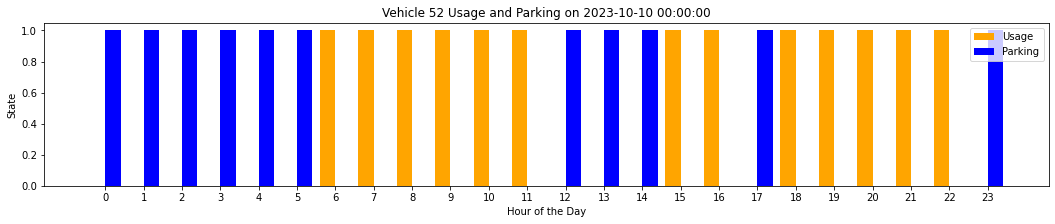

In [364]:
# Visualization: 24-hour Timeline for Usage and Parking
def plot_usage_parking(vehicle_id, day, data):
    day_data = data[(data['vehicle_id'] == vehicle_id) & (data['start_time'].dt.date == day)]
    usage = [0] * 24
    parking = [1] * 24  # Initially, the car is assumed to be parked
    
    for _, trip in day_data.iterrows():
        start_hour = trip['start_time'].hour
        end_hour = trip['stop_time'].hour
        for hour in range(start_hour, end_hour + 1):
            usage[hour] = 1
            parking[hour] = 0  # When in usage, it's not parked
    
    fig, ax = plt.subplots(figsize=(18, 3))
    bar_width = 0.4
    x = range(24)
    
    ax.bar(x, usage, width=bar_width, label="Usage", color='orange', align='center')
    ax.bar([i + bar_width for i in x], parking, width=bar_width, label="Parking", color='blue', align='center')
    
    ax.set_xticks([i + bar_width / 2 for i in x])
    ax.set_xticklabels(range(24))
    ax.set_xlabel("Hour of the Day")
    ax.set_ylabel("State")
    ax.set_title(f"Vehicle {vehicle_id} Usage and Parking on {day}")
    ax.legend()
    plt.show()
    
# Plot a 24-hour timeline for a specific vehicle and day
vehicle_id_example = 52
random_day = pd.to_datetime("2023-10-10")  # Example day
plot_usage_parking(vehicle_id_example, random_day, data)

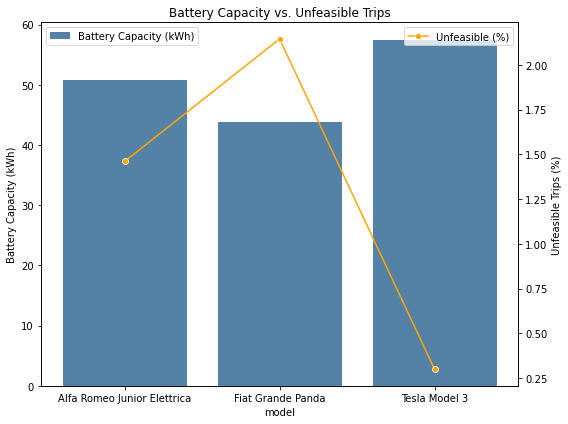

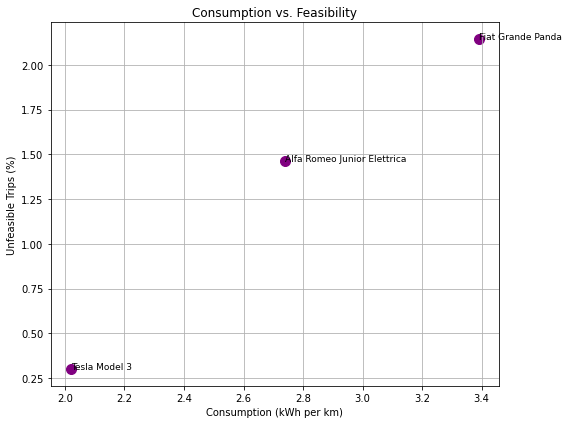

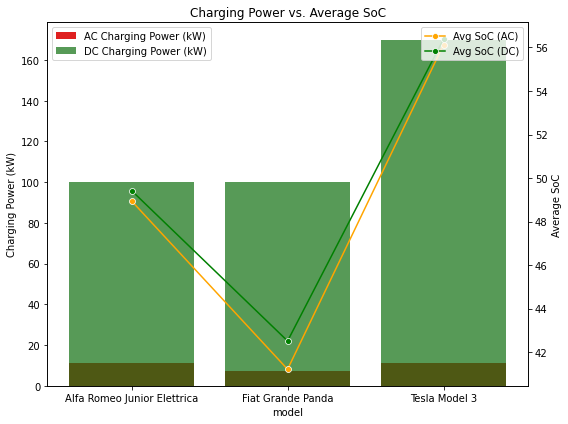

In [374]:
from math import pi
import numpy as np

# Bar chart: Battery Capacity vs. Unfeasible Trips
def plot_battery_capacity_vs_feasibility(simulation_results, vehicle_models):
    battery_capacity = [model["parameters"]["usable_battery_capacity_kwh"] for model in vehicle_models["models"]]
    unfeasible_percentage = simulation_results.groupby("model")["unfeasible_percentage"].mean()
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=unfeasible_percentage.index, y=battery_capacity, ax=ax, color="steelblue", label="Battery Capacity (kWh)")
    ax2 = ax.twinx()
    sns.lineplot(x=unfeasible_percentage.index, y=unfeasible_percentage.values, ax=ax2, marker="o", label="Unfeasible (%)", color="orange")
    ax.set_ylabel("Battery Capacity (kWh)")
    ax2.set_ylabel("Unfeasible Trips (%)")
    ax.set_title("Battery Capacity vs. Unfeasible Trips")
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# Scatter plot: Consumption vs. Feasibility
def plot_consumption_vs_feasibility(simulation_results, vehicle_models):
    combined_consumption = [1000 / model["parameters"]["vehicle_consumption_mild_weather"]["combined_km"] for model in vehicle_models["models"]]
    unfeasible_percentage = simulation_results.groupby("model")["unfeasible_percentage"].mean()
    
    plt.figure(figsize=(8, 6))
    plt.scatter(combined_consumption, unfeasible_percentage.values, color="purple", s=100)
    for i, model_name in enumerate(unfeasible_percentage.index):
        plt.text(combined_consumption[i], unfeasible_percentage.values[i], model_name, fontsize=9)
    plt.xlabel("Consumption (kWh per km)")
    plt.ylabel("Unfeasible Trips (%)")
    plt.title("Consumption vs. Feasibility")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Bar chart: Charging Power vs. Average SoC
def plot_charging_power_vs_soc(simulation_results_ac, simulation_results_dc, vehicle_models):
    ac_power = [model["parameters"]["charging_power_ac_kw"] for model in vehicle_models["models"]]
    dc_power = [model["parameters"]["fast_charging_power_dc_kw"] for model in vehicle_models["models"]]
    avg_soc_ac = simulation_results_ac.groupby("model")["avg_soc"].mean()
    avg_soc_dc = simulation_results_dc.groupby("model")["avg_soc"].mean()
    
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.barplot(x=avg_soc_ac.index, y=ac_power, ax=ax, color="red", label="AC Charging Power (kW)")
    sns.barplot(x=avg_soc_dc.index, y=dc_power, ax=ax, color="green", label="DC Charging Power (kW)", alpha=0.7)
    ax2 = ax.twinx()
    sns.lineplot(x=avg_soc_ac.index, y=avg_soc_ac.values, ax=ax2, marker="o", color="orange", label="Avg SoC (AC)")
    sns.lineplot(x=avg_soc_dc.index, y=avg_soc_dc.values, ax=ax2, marker="o", color="green", label="Avg SoC (DC)")
    ax.set_ylabel("Charging Power (kW)")
    ax2.set_ylabel("Average SoC")
    ax.set_title("Charging Power vs. Average SoC")
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.tight_layout()
    plt.show()

# Radar chart: Multi-Metric Comparison
def plot_radar_chart(vehicle_models, simulation_results):
    radar_data = []
    for model in vehicle_models['models']:
        name = model["name"]
        if name not in simulation_results[0].index or name not in simulation_results[1].index:
            print(f"Model {name} not found in one of the simulation results. Skipping.")
            continue
        battery_capacity = model["parameters"]["usable_battery_capacity_kwh"]
        avg_soc_ac = simulation_results[0].loc[name, "avg_soc"]
        avg_soc_dc = simulation_results[1].loc[name, "avg_soc"]
        unfeasibility = simulation_results[0].loc[name, "unfeasible_percentage"]

        radar_data.append({
            "name": name,
            "Battery Capacity (kWh)": battery_capacity,
            "Avg SOC AC (%)": avg_soc_ac,
            "Avg SOC DC (%)": avg_soc_dc,
            "Unfeasibility (%)": unfeasibility,
        })
    categories = ["Battery Capacity", "Avg SoC (AC)", "Avg SoC (DC)", "Unfeasibility (%)"]
    n_categories = len(categories)
    
    radar_data = []
    for model in vehicle_models["models"]:
        name = model["name"]
        battery_capacity = model["parameters"]["usable_battery_capacity_kwh"]
        # print(simulation_results[0])
        # avg_soc_ac = simulation_results[0].loc[name, "avg_soc"]
        avg_soc_ac = simulation_results[0][simulation_results[0]["model"]==model]["avg_soc"].mean()
        # avg_soc_dc = simulation_results[1].loc[name, "avg_soc"]
        avg_soc_dc = simulation_results[1][simulation_results[1]["model"]==model]["avg_soc"].mean()
        # unfeasibility = simulation_results[0].loc[name, "unfeasible_percentage"]
        unfeasibility = simulation_results[0][simulation_results[0]["model"]==model]["unfeasible_percentage"].mean()
        radar_data.append([battery_capacity, avg_soc_ac, avg_soc_dc, unfeasibility])
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={"projection": "polar"})
    angles = [n / n_categories * 2 * pi for n in range(n_categories)]
    angles += angles[:1]
    
    for i, model_data in enumerate(radar_data):
        values = model_data + model_data[:1]
        ax.plot(angles, values, label=vehicle_models["models"][i]["name"])
        ax.fill(angles, values, alpha=0.25)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1))
    ax.set_title("Multi-Metric Comparison of EV Models")
    plt.show()

# Call visualizations
plot_battery_capacity_vs_feasibility(simulation_results_ac, ev_models_data)
plot_consumption_vs_feasibility(simulation_results_ac, ev_models_data)
plot_charging_power_vs_soc(simulation_results_ac, simulation_results_dc, ev_models_data)
# plot_radar_chart(ev_models_data, (simulation_results_ac, simulation_results_dc))

In [323]:
simulation_results_ac["cluster"] = clusters
simulation_results_dc["cluster"] = clusters

In [324]:
simulation_results_ac

,vehicle_id,model,unfeasible_trips,total_trips,unfeasible_percentage,avg_soc,cluster
0,1,Alfa Romeo Junior Elettrica,10,864,1.157407,49.971231,2
1,2,Fiat Grande Panda,58,593,9.780776,41.810818,2
2,3,Tesla Model 3,19,771,2.464332,57.315632,2
3,4,Alfa Romeo Junior Elettrica,0,696,0.000000,50.335789,1
4,5,Fiat Grande Panda,47,558,8.422939,42.416197,2
...,...,...,...,...,...,...,...
995,996,Tesla Model 3,7,594,1.178451,56.744962,2
996,997,Alfa Romeo Junior Elettrica,11,568,1.936620,49.682396,2
997,998,Fiat Grande Panda,0,1121,0.000000,40.614480,0
998,999,Tesla Model 3,0,2024,0.000000,55.537347,1


Cluster Summary:
   cluster type  unfeasible_percentage_mean  unfeasible_percentage_std  \
0        0   AC                    0.458403                   2.699291   
1        0   DC                    0.347219                   1.742837   
2        1   AC                    0.577230                   5.774807   
3        1   DC                    0.350961                   4.718970   
4        2   AC                    3.788857                   6.228427   
5        2   DC                    3.312038                   5.072240   

   avg_soc_mean  avg_soc_std  total_trips_sum  unfeasible_trips_sum  
0     49.128184     6.559416           455475                  3266  
1     49.551282     5.866514           455475                  1576  
2     48.354514     7.298610           599669                 26739  
3     48.939893     6.404311           599669                 22496  
4     48.795979     7.599966           193917                  6687  
5     50.036051     5.956090           19391

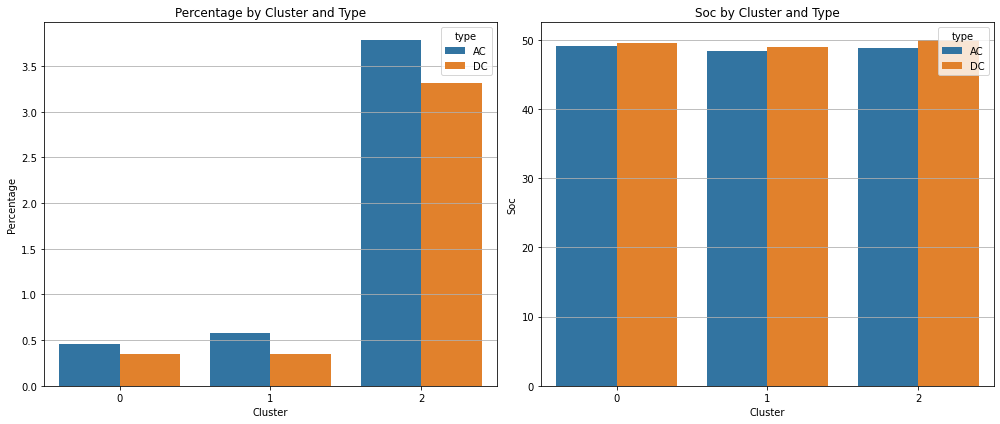

Parameter Comparison by Cluster and Model:
   cluster                        model  unfeasible_percentage    avg_soc  \
0        0  Alfa Romeo Junior Elettrica               0.703240  49.396263   
1        0            Fiat Grande Panda               0.457767  42.264639   
2        0                Tesla Model 3               0.033973  56.577185   
3        1  Alfa Romeo Junior Elettrica               0.221214  48.725217   
4        1            Fiat Grande Panda               1.115013  41.417465   
5        1                Tesla Model 3               0.073911  55.621959   
6        2  Alfa Romeo Junior Elettrica               4.255243  49.563024   
7        2            Fiat Grande Panda               5.478593  41.866186   
8        2                Tesla Model 3               0.983995  56.735728   

   total_trips  
0       305798  
1       309788  
2       295364  
3       392570  
4       397514  
5       409254  
6       126044  
7       127398  
8       134392  


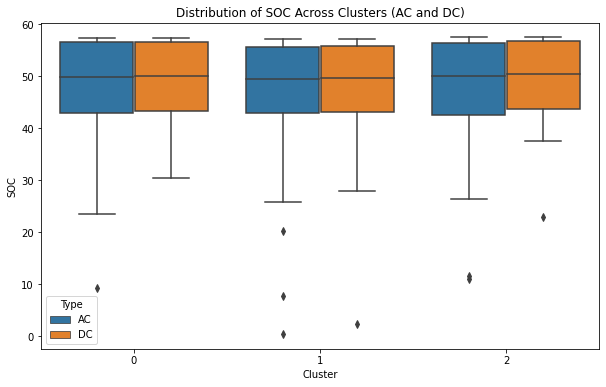

In [384]:
# Combine both AC and DC results for holistic analysis
simulation_results_ac['type'] = 'AC'
simulation_results_dc['type'] = 'DC'
combined_results = pd.concat([simulation_results_ac, simulation_results_dc], ignore_index=True)

# Aggregate performance metrics by cluster
cluster_summary = combined_results.groupby(['cluster', 'type']).agg({
    'unfeasible_percentage': ['mean', 'std'],
    'avg_soc': ['mean', 'std'],
    'total_trips': 'sum',
    'unfeasible_trips': 'sum'
}).reset_index()

# Flatten MultiIndex columns for readability
cluster_summary.columns = ['_'.join(col).strip('_') for col in cluster_summary.columns]

# Print summary
print("Cluster Summary:")
print(cluster_summary)

# Visualization: Performance metrics by cluster and type
metrics = ['unfeasible_percentage_mean', 'avg_soc_mean']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
for i, metric in enumerate(metrics):
    sns.barplot(data=cluster_summary, x='cluster', y=metric, hue='type', ax=axes[i])
    axes[i].set_title(f"{metric.split('_')[1].capitalize()} by Cluster and Type")
    axes[i].set_xlabel("Cluster")
    axes[i].set_ylabel(metric.split('_')[1].capitalize())
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()

# Vehicle parameters comparison
parameter_comparison = combined_results.groupby(['cluster', 'model']).agg({
    'unfeasible_percentage': 'mean',
    'avg_soc': 'mean',
    'total_trips': 'sum'
}).reset_index()

print("Parameter Comparison by Cluster and Model:")
print(parameter_comparison)

# Visualization: Box plot for SOC distribution by cluster and type
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_results, x='cluster', y='avg_soc', hue='type')
plt.title("Distribution of SOC Across Clusters (AC and DC)")
plt.xlabel("Cluster")
plt.ylabel("SOC")
plt.legend(title="Type")
plt.show()

# # Visualization: Radar chart comparison
# def plot_radar_by_cluster(cluster_summary, metrics):
#     labels = metrics
#     num_vars = len(labels)

#     for cluster in cluster_summary['cluster'].unique():
#         data = cluster_summary[cluster_summary['cluster'] == cluster]
#         values_ac = data.loc[data['type'] == 'AC', labels].values.flatten().tolist()
#         values_dc = data.loc[data['type'] == 'DC', labels].values.flatten().tolist()
        
#         angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
#         angles += angles[:1]
#         values_ac += values_ac[:1]
#         values_dc += values_dc[:1]
        
#         plt.figure(figsize=(6, 6))
#         ax = plt.subplot(111, polar=True)
#         plt.xticks(angles[:-1], labels, color='grey', size=8)
        
#         ax.plot(angles, values_ac, linewidth=1, linestyle='solid', label="AC")
#         ax.fill(angles, values_ac, alpha=0.2)
#         ax.plot(angles, values_dc, linewidth=1, linestyle='solid', label="DC")
#         ax.fill(angles, values_dc, alpha=0.2)
        
#         ax.set_yticks([])
#         plt.title(f"Radar Chart for Cluster {cluster}", size=15, color='darkblue')
#         plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
#         plt.show()

# plot_radar_by_cluster(cluster_summary, ['unfeasible_percentage_mean', 'avg_soc_mean'])

In [331]:
combined_results

,vehicle_id,model,unfeasible_trips,total_trips,unfeasible_percentage,avg_soc,cluster,type
0,1,Alfa Romeo Junior Elettrica,10,864,1.157407,49.971231,2,AC
1,2,Fiat Grande Panda,58,593,9.780776,41.810818,2,AC
2,3,Tesla Model 3,19,771,2.464332,57.315632,2,AC
3,4,Alfa Romeo Junior Elettrica,0,696,0.000000,50.335789,1,AC
4,5,Fiat Grande Panda,47,558,8.422939,42.416197,2,AC
...,...,...,...,...,...,...,...,...
1995,996,Tesla Model 3,7,594,1.178451,56.808484,2,DC
1996,997,Alfa Romeo Junior Elettrica,11,568,1.936620,50.207207,2,DC
1997,998,Fiat Grande Panda,0,1121,0.000000,41.690000,0,DC
1998,999,Tesla Model 3,0,2024,0.000000,55.623120,1,DC


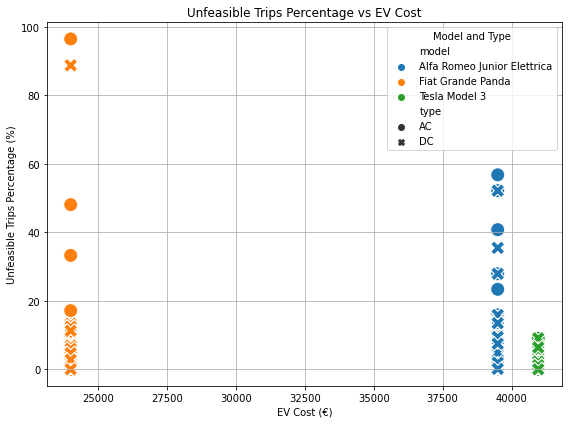

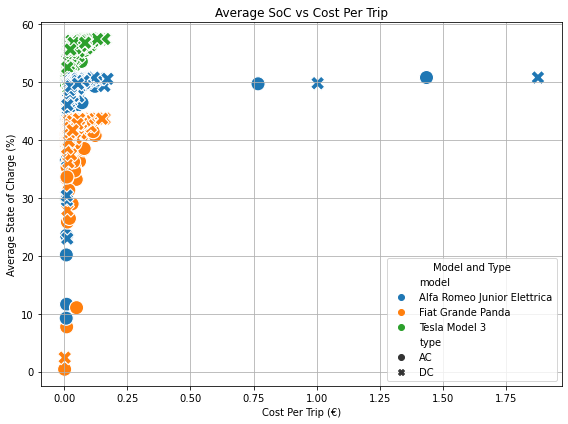

Performance-Cost Analysis Summary:
                         model type  avg_unfeasible_percentage    avg_soc  \
0  Alfa Romeo Junior Elettrica   AC                   1.460039  48.947565   
1  Alfa Romeo Junior Elettrica   DC                   1.226279  49.423590   
2            Fiat Grande Panda   AC                   2.144571  41.212051   
3            Fiat Grande Panda   DC                   1.687218  42.512809   
4                Tesla Model 3   AC                   0.298877  56.133388   
5                Tesla Model 3   DC                   0.266451  56.393401   

   avg_charging_cost  ev_cost  avg_cost_per_trip  
0             33.020    39500           0.040270  
1             43.180    39500           0.052661  
2             28.470    24000           0.030689  
3             37.230    24000           0.040131  
4             37.375    40970           0.037452  
5             48.875    40970           0.048975  


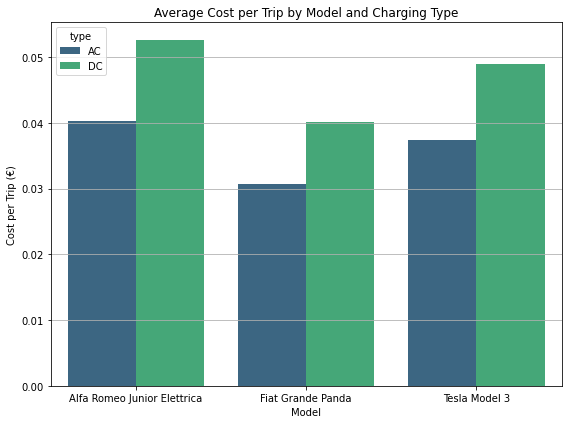

In [386]:
# EV models data
ev_models_data_reduced = {
    "Alfa Romeo Junior Elettrica": {
        "usable_battery_capacity_kwh": 50.8,
        "cost": 39500
    },
    "Fiat Grande Panda": {
        "usable_battery_capacity_kwh": 43.8,
        "cost": 24000
    },
    "Tesla Model 3": {
        "usable_battery_capacity_kwh": 57.5,
        "cost": 40970
    }
}

# Charging prices in Italy (€/kWh)
charging_prices = {
    "AC": 0.65,
    "DC": 0.85
}

# Combine AC and DC results
combined_results = pd.concat([simulation_results_ac, simulation_results_dc], ignore_index=True)

# Add EV cost and charging cost to the dataframe
def calculate_charging_cost(row):
    model_data = ev_models_data_reduced[row["model"]]
    price_per_kwh = charging_prices[row["type"]]
    full_charge_cost = model_data["usable_battery_capacity_kwh"] * price_per_kwh
    return full_charge_cost

combined_results["ev_cost"] = combined_results["model"].map(lambda x: ev_models_data_reduced[x]["cost"])
combined_results["charging_cost"] = combined_results.apply(calculate_charging_cost, axis=1)

# Calculate cost-per-trip
combined_results["cost_per_trip"] = combined_results["charging_cost"] / combined_results["total_trips"]

# Visualization: Unfeasible Percentage vs EV Cost
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_results, x="ev_cost", y="unfeasible_percentage", hue="model", style="type", s=200)
plt.title("Unfeasible Trips Percentage vs EV Cost")
plt.xlabel("EV Cost (€)")
plt.ylabel("Unfeasible Trips Percentage (%)")
plt.legend(title="Model and Type")
plt.tight_layout()
plt.grid()
plt.show()

# Visualization: Average SoC vs Cost per Trip
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_results, x="cost_per_trip", y="avg_soc", hue="model", style="type", s=200)
plt.title("Average SoC vs Cost Per Trip")
plt.xlabel("Cost Per Trip (€)")
plt.ylabel("Average State of Charge (%)")
plt.legend(title="Model and Type")
plt.tight_layout()
plt.grid()
plt.show()

# Summary Table for Performance-Cost Analysis
performance_cost_summary = combined_results.groupby(["model", "type"]).agg(
    avg_unfeasible_percentage=("unfeasible_percentage", "mean"),
    avg_soc=("avg_soc", "mean"),
    avg_charging_cost=("charging_cost", "mean"),
    ev_cost=("ev_cost", "mean"),
    avg_cost_per_trip=("cost_per_trip", "mean")
).reset_index()

print("Performance-Cost Analysis Summary:")
print(performance_cost_summary)

# Visualization: Cost vs Performance Trade-off
plt.figure(figsize=(8, 6))
sns.barplot(data=performance_cost_summary, x="model", y="avg_cost_per_trip", hue="type", palette="viridis")
plt.title("Average Cost per Trip by Model and Charging Type")
plt.ylabel("Cost per Trip (€)")
plt.xlabel("Model")
plt.xticks()
plt.grid(axis="y")
plt.tight_layout()
plt.show()